![](SignsofDiabetes-1330228954-770x533-1.jpeg)


Imagine you are a Data Scientist in Federal Healthcare.The Government is waging a war against Diabetes, and you're at the frontline. In this project you will train a machine learning model to predict whether an individual is at risk of developing diabetes.(Classification Problem)

This project is attempted in three parts:<br>
&emsp;1.Collecting and cleaning Data<br>
&emsp;2.Exploratory Data Analysis<br>
&emsp;3.Training a Machine Learning Model<br>


In [ ]:
#Part 1. Collect data from UCI Repository  Understanding the Data and Pre-processing

#import libraries
import pandas as pd

#read the csv dataset into a DataFrame
df = pd.read_csv("diabetes_data_upload.csv")
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:

#replace string values in DataFrame with .replace
df = df.replace("No",0)
df = df.replace("Yes",1)
df = df.replace("Positive",1)
df = df.replace("Negative",0)

#replace: 'Gender' column values to isMale = 1
df = df.replace("Male",1)
df= df.replace("Female",0)

df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
#check for missing values

df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
#check datatypes of the columns

df.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

In [ ]:
#replace column 'Gender' with 'ismale'
replace = {"Gender":"ismale"}
df = df.rename(columns = replace)

#change the column names to lowercase for consistency
df.columns = df.columns.str.lower()

#Export DataFrame to csv

df.to_csv("diabetes_data_clean.csv",index=None)
pd.read_csv("diabetes_data_clean.csv")

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


48.02884615384615
47.5


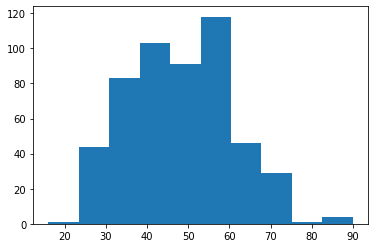

In [ ]:
#Part2 Data Visualization and Statistics

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

#Examine age with a Histogram
plt.hist(df["age"])

print(df["age"].mean())
print(df["age"].median())

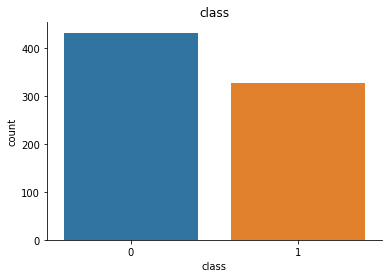

In [ ]:
#Creating countplot with a 'FOR Loop' for the various columns from index 1 as 'age' has already been studied.
columns = df.columns[1:]
for column in columns:
    sns.countplot(df[column])
    plt.title(column)
    sns.despine()
 	#plt.show() -- uncomment code to see plot for individual columns 

Questions 

1.Is obesity related to Diabetes status?<br>
2. Is age related to Diabetes status?

In [ ]:
#Analysing dependence between 2 categorical variables, using a Crosstab 
obesity_diabetes_crosstab= pd.crosstab(df['class'],df['obesity'])
obesity_diabetes_crosstab

obesity,0,1
class,,
0,173,27
1,259,61


In [ ]:
#Performing Chi-square Contingency test ----- we get a tuple with 4 values: Chisquare Statistics, p-value,degree of freedom, expected array if variables are independent)
chi2_contingency(obesity_diabetes_crosstab)

#The result below shows that the two variables are fairly independent

(2.3274739583333344,
 0.12710799319896815,
 1,
 array([[166.15384615,  33.84615385],
        [265.84615385,  54.15384615]]))

In [ ]:
#Analysing dependence between 2 categorical variables, using a Crosstab 
ismale_diabetes_crosstab= pd.crosstab(df['class'],df['ismale'])
ismale_diabetes_crosstab

ismale,0,1
class,,
0,19,181
1,173,147


In [ ]:
#Performing Chi-square Contingency test ----- we get a tuple with 4 values: Chisquare Statistics, p-value,degree of freedom, expected array if variables are independent)
chi2_contingency(ismale_diabetes_crosstab)

#The result below shows that the two variables 'class' and 'ismale' are quite DEPENDANT as the array varies.

#Suggestions for further Hypotheses:
#1. polyuria vs class
#2.polyuria vs ismale

(103.03685927972558,
 3.289703730553317e-24,
 1,
 array([[ 73.84615385, 126.15384615],
        [118.15384615, 201.84615385]]))

Text(0.5, 1.0, 'Diabetes status vs Age')

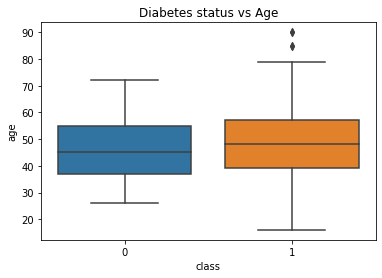

In [ ]:
#Is there a relationship between age and diabetic status?
#Creating a boxplot to study a numerical variable and a categorical variable
sns.boxplot(df['class'],df['age'])
plt.title("Diabetes status vs Age")

In [ ]:
#The Median line for those with Diabetes seems slightly higher than for those without. Sicne we cannot safely say that there's a significant difference, performing statistical analysis next.

no_diabetes = df[df['class']==0]
no_diabetes['age'].mean()

46.36

In [ ]:
diabetes = df[df['class']==1]
diabetes['age'].mean()

49.071875

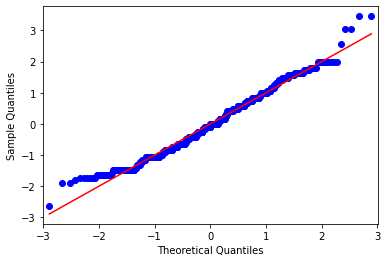

In [ ]:
#qqplot helps us determine if a distribution is normal or otherwise.

qqplot(df['age'],fit=True,line ='s')
plt.show()


In [ ]:
#In the plot above, it seems we have slight skews at the end, but for the most part the qqplot is on the 45 degree angle aka it is normally distributed. Next, we conduct a z-test to test the differences between whether our diabetic and non-diabetic ages are similar or otherwise. 

#Z-test of differences to get respective p-values

ztest(diabetes['age'],no_diabetes['age'])

(2.4882300316303065, 0.012838066562901769)

We reject the null-hypothesis that there is no difference between the ages of those with or without diabetes.

<AxesSubplot:>

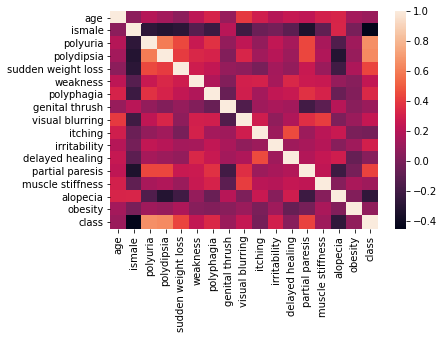

In [ ]:
#Finally, we will do a Correlation Plot Study
sns.heatmap(df.corr())

In [ ]:
#Part 3. Machine Learning Model Training

#import libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

#prepare independent and dependent variables

df= pd.read_csv("diabetes_data_clean.csv")
X = df.drop('class', axis = 1)
y= df['class']

#Split data into train and test sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y)



In [ ]:
#Begin Model Training

#start with DummyClassifier to establish baseline

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

#assess DummyClassifier Model

print(confusion_matrix(y_test, dummy_pred))

#Print a classification report comparing test data with prediction

print(classification_report(y_test,dummy_pred))



[[ 0 40]
 [ 0 64]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.62      1.00      0.76        64

    accuracy                           0.62       104
   macro avg       0.31      0.50      0.38       104
weighted avg       0.38      0.62      0.47       104



In [ ]:
#Begin LogisticRegression Modelling

logr= LogisticRegression(max_iter = 10000)
logr.fit(X_train,y_train)
logr_pred = logr.predict(X_test)

print(confusion_matrix(y_test,logr_pred))

#Looks like FN/FP values( BELOW) FROM LogisticRegression Modelling are comparably more preferable than the values from the earlier DummyClassifier.


print(classification_report(y_test, logr_pred))

#The accuracy scores(BELOW) from Logistic Regression model is dramatically an improvement.


[[37  3]
 [ 3 61]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.95      0.95      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



In [ ]:
#Try DecisionTree Modeling to see if the results get better...

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred= tree.predict(X_test)

print(confusion_matrix(y_test,tree_pred))

print(classification_report(y_test, tree_pred))

[[40  0]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [ ]:
#Try RandomForest Classifier Modeling

forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)

print(confusion_matrix(y_test,forest_pred))

print(classification_report(y_test, forest_pred))

#RandomForest Model seems to be the best Classiciation Model with the most accuracy. Let's next look at the features that went into modelling.

[[39  1]
 [ 1 63]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [ ]:
#Finding the Feature Importances of Random Forest Model

pd.DataFrame({'feature':X.columns, 'importance' :forest.feature_importances_}).sort_values('importance',ascending = False)

,feature,importance
2,polyuria,0.208932
3,polydipsia,0.203192
1,ismale,0.109867
0,age,0.105274
4,sudden weight loss,0.058537
14,alopecia,0.040201
12,partial paresis,0.039409
10,irritability,0.033641
6,polyphagia,0.032234
11,delayed healing,0.031619


To summarize, we trained a baseline model, then three better models - Logistic Regression, Decision Tree, Random Forest, and identified Random Forest Model as a pretty good predictor for Early Diabetes Detection. 